Welcome to the first ever MIT Paleomag E-Lab!
We will put your theory to the test by presenting you with a real dataset measured in our laboratory in the Green building.

We will be using the PmagPy software package to analyse these data, which you should have installed prior to the class. If you are having any issues, please contact Caue (caue@mit.edu) or Jay (jayshah@mit.edu), who will be happy to help!

Apologies for the lack of interactivity usually experienced in this class. We're hoping that the use of Jupyter notebooks to analyse the data will somewhat bring the interactivity back! Please let us know how it goes! This is very exciting for us :)

In [2]:
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb
from pmagpy import convert_2_magic as convert
import matplotlib.pyplot as plt # our plotting buddy
import numpy as np # the fabulous NumPy package
import pandas as pd # and of course Pandas
# test if Basemap and/or cartopy is installed
has_basemap, Basemap = pmag.import_basemap()
has_cartopy, Cartopy = pmag.import_cartopy()
# test if xlwt is installed (allows you to export to excel)
try:
    import xlwt
    has_xlwt = True
except ImportError:
    has_xlwt = False
# This allows you to make matplotlib plots inside the notebook.  
%matplotlib inline 
from IPython.display import Image
import os

print('All modules imported!')

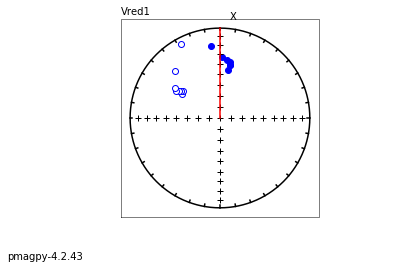

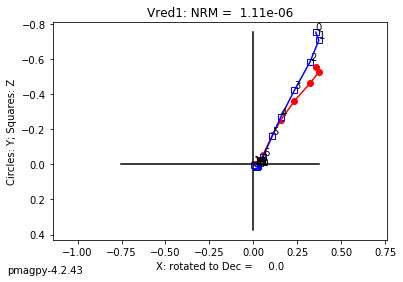

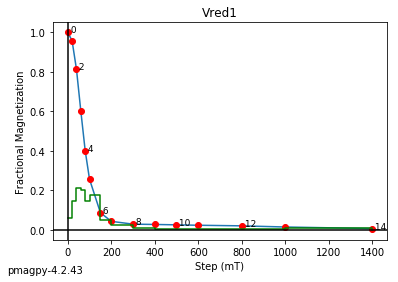

In [3]:
# we can make the figure dictionary that pmagplotlib likes:
ZED={'eqarea':1,'zijd':2, 'demag':3}# make datablock
 # read in data
data=pd.read_csv('vred1.dat',delim_whitespace=True,header=None)
data.columns=['specimen','step','m (emu)','dec','inc']
data['m SI']=data['m (emu)']*1e-3 # convert to SI units from lab (emu) units
data['quality']='g' # add in default "good" quality designation
data['step SI']=data['step']*1e-3 # convert to tesla 
data['blank']="" # this is a dummy variable expected by plotZED
specimens=data.specimen.unique()
angle=0
units='T' # these are AF data
cnt=1
for s in specimens:
    # we can make the figure dictionary that pmagplotlib likes:
    ZED={'eqarea':cnt,'zijd':cnt+1, 'demag':cnt+2}# make datablock
    cnt+=3
    spec_df=data[data.specimen==s]
    datablock=spec_df[['step SI','dec','inc','m SI','blank','quality']].values.tolist()
    pmagplotlib.plot_zed(ZED,datablock,angle,s,units)